<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px; 
"><span style='color:white'><b> Machine Translation Using Encoder-Decoder with Attention Mechanism</b></span></h1>

<br>

<center>
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20231226141038/Machine-Translation-Model.png" 
         alt ="Machine Translation" 
         style='width: 60%;'>
    <figcaption>
            Source: <a href='https://media.geeksforgeeks.org/wp-content/uploads/20231226141038/Machine-Translation-Model.png'> GFG | Machine Translation</a>
    </figcaption>
</center>

## 🎯 Objective
 The goal of this notebook is to practice Encoder-Decoder architecture by doing Machine translation. In this notebook I am doing English to hindi translation using Encoder-Decoder .

## 📁 Dataset
The dataset used in this notebook is the '<b>IIT Bombay English-Hindi Translation Dataset</b>' uploaded by @VAIBHAV KUMAR on kaggle. This Data contains 1,561,840 instances of Hindi - English Translation

<br>

<hr>

## Table of contents
- [1 | Overview  of working technology](#1)

- [2 | Importing Required Libraries & DataSource](#2)
   > - [Load & Inspect Data](#2.1)
 
- [3 | Data Exploration](#3)
   > - [Computing Dimension of Dataset](#3.1)
   > - [Statistical Summary of Dataset](#3.2)
   > - [Checking if There's Any Duplicate Records](#3.3)
   > - [Computing Total No. of Missing Values and the Percentage of Missing Values](#3.4)
   > - [Performing Descriptive Analysis](#3.5)
   
   
- [4 | Preprocessing](#4) 
   > - [Dropping Duplicates and Null Values](#4.1)
   > - [Lowercasing](#4.2)
   > - [Removing Html tags](#4.3)
   > - [Removing URLs](#4.4)
   > - [Chat word treatment](#4.5)
   > - [Removing Emojis](#4.6)
   > - [Removing contractions](#4.7)
   > - [Remove Non-Hindi and Alphanumeric characters](#4.8)
   > - [WordCloud](#4.9)
   > - [Tokenize on the Data ](#4.10)
   > - [Split the Data into Independent and Dependent Variable](#4.11)
   > - [Padding the Data](#4.12)
   > - [Train Test and split](#4.13)
   
- [5 | Modelling](#5)
   > - [Enocer Decoder model](#5.1)
   > - [Enocer Decoder model Evaluation](#5.2)
   > - [Prediction from Enocer Decoder model](#5.3)
   > - [Enocer Decoder model with attention](#5.4)
   > - [Enocer Decoder model's with attention Evaluation](#5.5)
   > - [Prediction from Enocer Decoder model with attention](#5.6)
   > - [Saving the weights](#5.7)

<br>

<hr>

# Author Details:
- **Name: Omkar Mahanandia**
- **Email: omkarmahanandia@gmail.com**
- **LinkedIn: www.linkedin.com/in/omkarmahanandia**
- **GitHub: https://github.com/Omkarmahanandia36**

<a id='1'></a>
# 1 | Overview of Working Technology

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px; 
"><span style='color:white'><b> Ecoder Decoder Architecture without Attention </b></span></h1>

![Encoder](https://6chaoran.wordpress.com/wp-content/uploads/2019/01/encoder-decoder-architecture.png?w=640)

<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;background-position: 0px 0px; 
"><span style='color:white'><b> Ecoder Decoder Architecture with Attention </b></span></h1>

![Encoder](https://www.researchgate.net/publication/377750342/figure/fig2/AS:11431281220369226@1706414219715/RNN-encoder-decoder-with-an-Attention-mechanism.png)

### Encoder-Decoder Architecture in RNNs:
- **Architecture**: 
  - Comprises two RNNs: an Encoder and a Decoder.
  - Encoder processes the input sequence and converts it into a fixed-size context vector.
  - Decoder takes this context vector and generates the output sequence step by step.

- **Encoder**:
  - Takes input sequence one token at a time.
  - Outputs a context vector summarizing the input sequence.
  - Can use various RNN variants like LSTM or GRU.

- **Decoder**:
  - Takes the context vector from the Encoder and generates the output sequence.
  - Processes the output sequence step by step, incorporating information from the context vector.
  - Can have a different architecture from the Encoder, but typically uses the same RNN variant.

- **Training**:
  - During training, both Encoder and Decoder are jointly trained using teacher forcing.
  - Teacher forcing involves providing the correct previous target token as input to the Decoder at each step.

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='2'></a>
# 2 | Importing Required Libraries & DataSource

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.4 MB/s eta 0:00:00


In [2]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing 
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-09-19 09:25:20.670013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 09:25:20.670114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 09:25:20.838184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/english-hindi-dataset/Dataset_English_Hindi.csv


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='1.1'></a>
# Load and Inspect Dataset

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [4]:
data = pd.read_csv('/kaggle/input/english-hindi-dataset/Dataset_English_Hindi.csv')

In [5]:
data.sample(5)

,English,Hindi
103446,there was one thing in common:,एक चीज़ सामान्य थी:
49934,"He arrived in England , remember , with very l...",याद रखें कि इंग़्लैंड आगमन के समय वह बहुत कम अ...
97602,"Moreover, I think,","इसके अलावा मुझे लगता है,"
41270,All the brothers in a family share a wife .,सभी भाई मिलकर एक पत्नी रख लेते है .
85985,It consists of Roy 's writings on philosophica...,राय का यह लेखन आधुनिक विज्ञान के दार्शनिक परिण...


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='3'></a>
# 3 | Data Exploration

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='3.1'></a>
#### 3.1. Computing Dimension of Dataset

In [6]:
print("dataset shape: ",data.shape)

dataset shape:  (130476, 2)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* There is total **1561841 records** and **2 columns** availabe in the data.

<a id='3.2'></a>
#### 3.2. Statistical Summary of Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130476 entries, 0 to 130475
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  130474 non-null  object
 1   Hindi    130164 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


<a id='3.3'></a>
#### 3.3. Checking if There's Any Duplicate Records.

In [8]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  2788


<a id='3.4'></a>
#### 3.4. Computing Total No. of Missing Values and the Percentage of Missing Values

In [9]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
English,2,0.00
Hindi,312,0.24


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Inference:</font></h3>

* Some of the Attribute are having Missing Values.  

<a id='3.5'></a>
#### 3.5. Performing Descriptive Analysis

In [10]:
round(data.describe().T,2)

,count,unique,top,freq
English,130474,126959,(Laughter),555
Hindi,130164,100228,(हँसी),212


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='4'></a>
# 4 | Preprocessing

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='4.1'></a>
### **1. Dropping Duplicates and Null Values**

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.dropna(inplace = True)

<a id='4.2'></a>
### **2. Lowercasing**

In [13]:
data['English'] = data['English'].str.lower()

<a id='4.3'></a>
### **3. Removing Html tags**

In [14]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [15]:
data['English'] = data['English'].apply(remove_html_tags)

<a id='4.4'></a>
### **4.  Removing URLs**

In [16]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

<a id='4.5'></a>
### **5. Chat word treatment**

In [17]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [18]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [19]:
data['English'] = data['English'].apply(chat_conversion)

<a id='4.6'></a>
### **6. Removing Emojis**

In [20]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [21]:
data['English'] = data['English'].apply(remove_emoji)
data['Hindi'] = data['Hindi'].apply(remove_emoji)

<a id='4.7'></a>
### **7. Removing contraction**

In [22]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

<a id='4.8'></a>
### **8. Remove Non-Hindi and Alphanumeric characters**

In [23]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text
    
    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")
        
data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

In [24]:
data.sample(5)

,English,Hindi
50914,all district court cases are transferred to it,सभी जिल अदालतों के मामले उसके पास स्थानांतरित ...
91140,can occur without a significant relationship,जब तक कि एक रिश्ता न हो।
107563,all the others have been all those three,बाकी सभी ये तीनो थे
38596,to fundamentally reframe,की सरकार में मूलरूपी नयी सरंचना हो
59297,those public authorities in performing their p...,वह सार्वज़निक अथॉरिटीज़ जब अपने सार्वज़निक कार...


<a id='4.9'></a>
### **9. WordCloud**

In [25]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))
    
    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)
    
    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

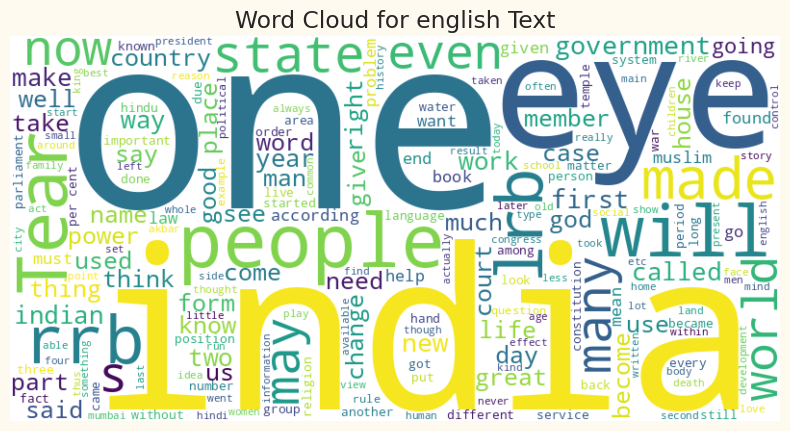

In [26]:
# Generate word clouds for English and Hindi columns
generate_wordcloud(data['English'], 'english')

In [27]:
data.shape

(127375, 2)

In [28]:
data = data[data['English'].str.len() <= 50]

In [29]:
data.shape

(50157, 2)

In [30]:
# Add <start> and <end> tokens to Hindi sentences
data['Hindi'] = ['<start> ' + sentence + ' <end>' for sentence in data['Hindi']]

<a id='4.10'></a>
### **10. Tokenize on the Data**

In [31]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])

In [32]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])

In [33]:
len(tok.word_index),len(tok_hindi.word_index)

(22870, 24779)

In [34]:
len(tok.word_index),len(tok_hindi.word_index)

(22870, 24779)

In [35]:
tok.document_count

50157

#### **Converting data in numerical forms**

In [36]:
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [37]:
data

,English,Hindi
0,[148],"[1, 13034, 2]"
1,[2853],"[1, 13035, 2]"
2,[2853],"[1, 13036, 2]"
3,[2853],"[1, 4577, 2]"
4,[3819],"[1, 9695, 2]"
...,...,...
130461,"[62, 52, 9, 14, 6, 964, 157]","[1, 99, 49, 21, 11, 1833, 164, 9, 2]"
130462,"[1, 22869, 14, 10094, 27, 4615]","[1, 107, 2948, 9445, 17, 3284, 8, 3267, 45, 52..."
130464,"[5, 48, 13, 95, 10, 4, 253, 56, 459]","[1, 84, 22, 180, 9, 14, 13, 1285, 840, 2]"
130466,"[364, 46, 16, 212, 345]","[1, 1123, 36, 34, 1341, 15, 7, 16, 2]"


In [38]:
def calculate_max_sequence_length(eng,hindi):
    max_length_combined = max(max(len(seq) for seq in eng), max(len(seq) for seq in hindi))

    return max_length_combined

max_length_combined = calculate_max_sequence_length(data['English'],data['Hindi'])
max_length_combined

260

In [39]:
for num in data['English'][0]:
    print(num, end=' ')

148 

In [40]:
# Print corresponding words horizontally
for num in data['English'][0]:
    word = tok.index_word.get(num, 'UNK')  
    print(word, end=' ')

help 

In [41]:
for num in data['Hindi'][0]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

start बचाओ end 

<a id='4.11'></a>
### **11. separating the data in dependent and independent**

In [42]:
hindi = data['Hindi']
english = data['English']

<a id='4.12'></a>
### **12. Padding**

In [43]:
x = pad_sequences(english,maxlen = max_length_combined,padding = 'post')
y = pad_sequences(hindi,maxlen = max_length_combined,padding = 'post')

In [44]:
x

array([[ 148,    0,    0, ...,    0,    0,    0],
       [2853,    0,    0, ...,    0,    0,    0],
       [2853,    0,    0, ...,    0,    0,    0],
       ...,
       [   5,   48,   13, ...,    0,    0,    0],
       [ 364,   46,   16, ...,    0,    0,    0],
       [   2,  189,   12, ...,    0,    0,    0]], dtype=int32)

In [45]:
y

array([[    1, 13034,     2, ...,     0,     0,     0],
       [    1, 13035,     2, ...,     0,     0,     0],
       [    1, 13036,     2, ...,     0,     0,     0],
       ...,
       [    1,    84,    22, ...,     0,     0,     0],
       [    1,  1123,    36, ...,     0,     0,     0],
       [    1,     6,    41, ...,     0,     0,     0]], dtype=int32)

<a id='4.13'></a>
### **13. splitting in train test and val**

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40125, 260)
Shape of x_test: (10032, 260)
Shape of y_train: (40125, 260)
Shape of y_test: (10032, 260)


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5'></a>
# 5 | Modelling

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='5.1'></a>
### **5.1. ENCODER-DECODER MODEL**

In [48]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok_hindi.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 260, 260)  │  5,946,460 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 260, 260)  │  6,442,800 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 156),     │    260,208 │ embedding[0][0]   │
│                     │ (None, 156),      │            │                   │
│                     │ (None, 156)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_1[0][0… │
│                     │ 156), (None,      │            │ lstm[0][1],       │
│                     │ 156), (None,      │            │ lstm[0][2]        │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 260,       │  3,890,460 │ lstm_1[0][0]      │
│                     │ 24780)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,800,136 (64.09 MB)

 Trainable params: 16,800,136 (64.09 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],  
)

Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 318s 250ms/step - accuracy: 0.9662 - loss: 0.9096 - val_accuracy: 0.9836 - val_loss: 0.1339
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 321s 256ms/step - accuracy: 0.9852 - loss: 0.1210 - val_accuracy: 0.9894 - val_loss: 0.0916
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 321s 256ms/step - accuracy: 0.9904 - loss: 0.0827 - val_accuracy: 0.9929 - val_loss: 0.0660
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 321s 255ms/step - accuracy: 0.9934 - loss: 0.0586 - val_accuracy: 0.9947 - val_loss: 0.0495
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 322s 256ms/step - accuracy: 0.9951 - loss: 0.0433 - val_accuracy: 0.9959 - val_loss: 0.0390


<a id='5.2'></a>
### **5.2. ENCODER-DECODER MODEL EVALUATION**

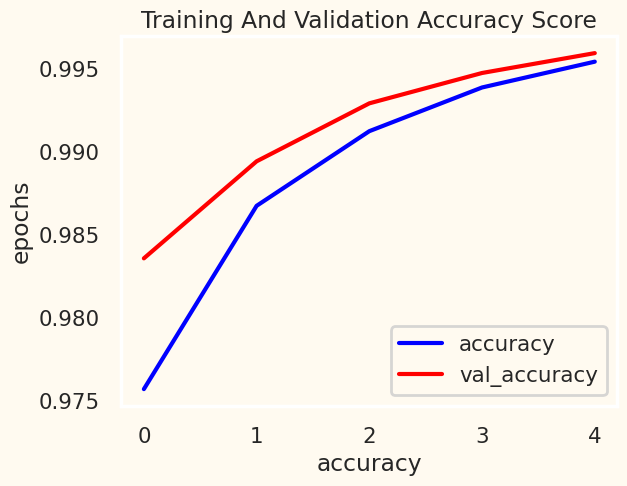

In [50]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

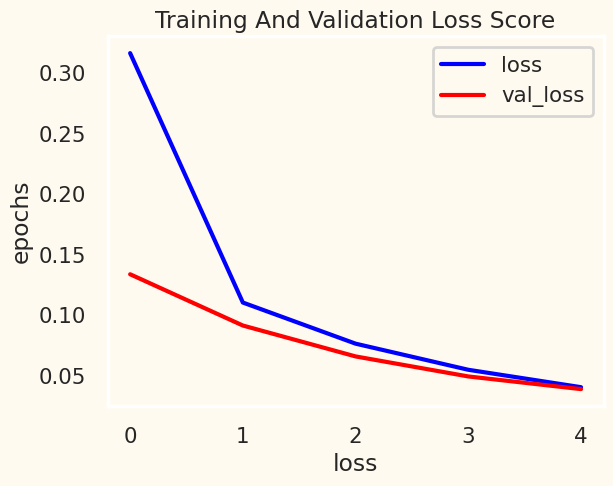

In [51]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

<a id='5.3'></a>
### **5.3. PREDICTION FROM ENCODER-DECODER MODEL**

In [52]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Shape of predictions: (10, 260, 24780)
Shape of predicted_tokens: (10, 260)
English sentence 1: sanskrit is the mother of all indian languages
Predicted Hindi translation 1: संस्कृत सभी भारतीय भाषाओं की माता है।

English sentence 2: so essentially it knows where to go
Predicted Hindi translation 2: तो अनिवार्य रूप से यह जानता है कहाँ जाना है

English sentence 3: i lost my best friend to a car accident
Predicted Hindi translation 3: तब मैंने अपने सबसे अच्छे मित्र को सड़क दुर्घटना में खो दिया

English sentence 4: clinics are listed in telephone directories
Predicted Hindi translation 4: इन की सूची में मिल जाएगी

English sentence 5: i do not think in language
Predicted Hindi translation 5: मै भाषा मे नही सोचती

English sentence 6: and some of the stuff you saw there
Predicted Hindi translation 6: और उसका एक हिस्सा आपने अभी देखा।

English sentence 7: 10 in a row you move on
Predicted Hindi translation 7: जब सवाल सही हो जाये आगे

English sentence 8: th

<a id='5.4'></a>
### **5.4. ENCODER-DECODER MODEL WITH ATTENTION**

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 260, 260)  │  5,946,460 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 260, 260)  │  6,442,800 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_2[0][0] │
│                     │ 156), (None,      │            │                   │
│                     │ 156), (None,      │            │                   │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_3[0][0… │
│                     │ 156), (None,      │            │ lstm_2[0][1],     │
│                     │ 156), (None,      │            │ lstm_2[0][2]      │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 260, 156)  │          0 │ lstm_3[0][0],     │
│ (Attention)         │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 260, 312)  │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 260,       │  7,756,140 │ concatenate[0][0] │
│                     │ 24780)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,665,816 (78.83 MB)

 Trainable params: 20,665,816 (78.83 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],  
)

Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 390s 309ms/step - accuracy: 0.9684 - loss: 0.6402 - val_accuracy: 0.9856 - val_loss: 0.1213
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 443s 310ms/step - accuracy: 0.9873 - loss: 0.1073 - val_accuracy: 0.9914 - val_loss: 0.0782
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 440s 309ms/step - accuracy: 0.9922 - loss: 0.0686 - val_accuracy: 0.9942 - val_loss: 0.0556
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 389s 310ms/step - accuracy: 0.9948 - loss: 0.0462 - val_accuracy: 0.9958 - val_loss: 0.0421
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 389s 311ms/step - accuracy: 0.9964 - loss: 0.0319 - val_accuracy: 0.9968 - val_loss: 0.0333


<a id='5.5'></a>
### **5.5. ENCODER-DECODER MODEL WITH ATTENTION EVALUATION**

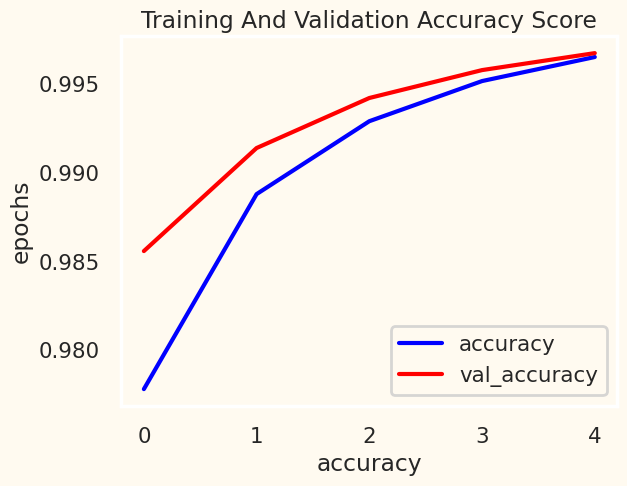

In [55]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

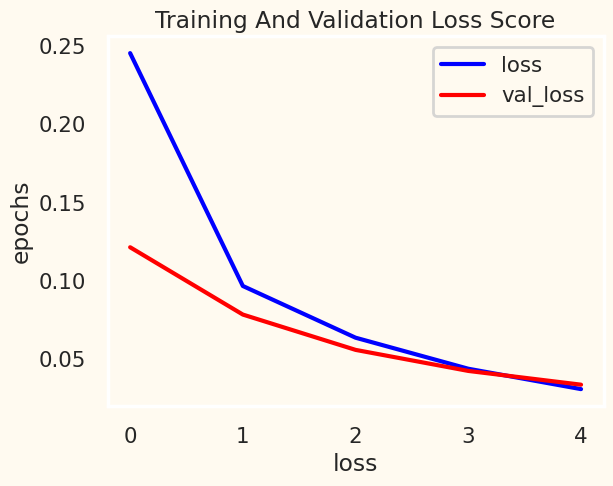

In [56]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

<a id='5.6'></a>
### **5.6. PREDICTION FROM ENCODER-DECODER MODEL WITH ATTENTION**

In [57]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Shape of predictions: (10, 260, 24780)
Shape of predicted_tokens: (10, 260)
English sentence 1: sanskrit is the mother of all indian languages
Predicted Hindi translation 1: संस्कृत सभी भारतीय भाषाओं की माता है।

English sentence 2: so essentially it knows where to go
Predicted Hindi translation 2: तो अनिवार्य रूप से यह जानता है कहाँ जाना है

English sentence 3: i lost my best friend to a car accident
Predicted Hindi translation 3: तब मैंने अपने सबसे अच्छे मित्र को सड़क दुर्घटना में खो दिया

English sentence 4: clinics are listed in telephone directories
Predicted Hindi translation 4: इन ढोरों की सूची में मिल जाएगी

English sentence 5: i do not think in language
Predicted Hindi translation 5: मै भाषा मे नही सोचती

English sentence 6: and some of the stuff you saw there
Predicted Hindi translation 6: और उसका एक हिस्सा आपने अभी देखा।

English sentence 7: 10 in a row you move on
Predicted Hindi translation 7: जब सवाल सही हो जाये आगे

English sentence

<a id='5.7'></a>
### **5.7. Saving the best weight**

In [58]:
# Save the entire model
model.save('encoder_decoder_model.h5')
print('Model saved succesfully!!')

Model saved succesfully!!
